## Name: Vaibhav Bichave

## Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [4]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(64,activation ='relu',input_shape=(3072,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
epochs = 10
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 36s 18ms/step - loss: 1.9123 - accuracy: 0.3070 - val_loss: 1.7579 - val_accuracy: 0.3621
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7535 - accuracy: 0.3670 - val_loss: 1.7033 - val_accuracy: 0.3862
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6918 - accuracy: 0.3938 - val_loss: 1.6856 - val_accuracy: 0.3922
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6568 - accuracy: 0.4047 - val_loss: 1.6436 - val_accuracy: 0.4114
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6309 - accuracy: 0.4146 - val_loss: 1.6174 - val_accuracy: 0.4207
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6029 - accuracy: 0.4270 - val_loss: 1.5890 - val_accuracy: 0.4306
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5863 - accuracy: 0.4322 - val_loss: 1.6051 - val_ac

In [10]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48      1000
           1       0.58      0.48      0.53      1000
           2       0.36      0.11      0.17      1000
           3       0.35      0.21      0.26      1000
           4       0.39      0.29      0.33      1000
           5       0.40      0.36      0.38      1000
           6       0.44      0.57      0.50      1000
           7       0.36      0.65      0.47      1000
           8       0.51      0.65      0.57      1000
           9       0.41      0.60      0.49      1000

    accuracy                           0.44     10000
   macro avg       0.43      0.44      0.42     10000
weighted avg       0.43      0.44      0.42     10000



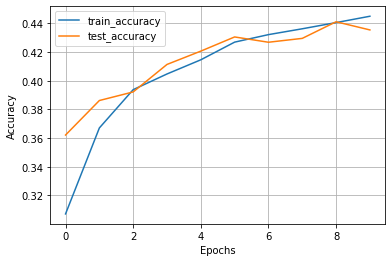

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

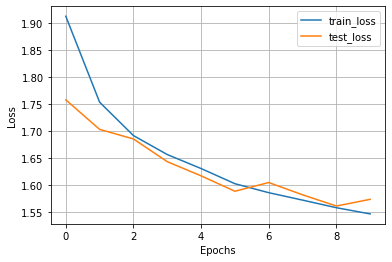

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();